In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [133]:
# Load the data 

df = pd.read_csv('/kaggle/input/finance/task.csv')


In [134]:
# Explore the Data
print(df.shape)
df = df.astype("int32")

(284807, 31)


In [135]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Time    284807 non-null  int32
 1   V1      284807 non-null  int32
 2   V2      284807 non-null  int32
 3   V3      284807 non-null  int32
 4   V4      284807 non-null  int32
 5   V5      284807 non-null  int32
 6   V6      284807 non-null  int32
 7   V7      284807 non-null  int32
 8   V8      284807 non-null  int32
 9   V9      284807 non-null  int32
 10  V10     284807 non-null  int32
 11  V11     284807 non-null  int32
 12  V12     284807 non-null  int32
 13  V13     284807 non-null  int32
 14  V14     284807 non-null  int32
 15  V15     284807 non-null  int32
 16  V16     284807 non-null  int32
 17  V17     284807 non-null  int32
 18  V18     284807 non-null  int32
 19  V19     284807 non-null  int32
 20  V20     284807 non-null  int32
 21  V21     284807 non-null  int32
 22  V22     284807 non-n

In [136]:
# Pre-process the data
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [137]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

1301
(283506, 31)


In [138]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


In [139]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [141]:
# Feature Scaling
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [142]:

# Create and train the random forest classifier
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_resampled_scaled, y_train_resampled)


y_pred = model.predict(X_test_scaled)

In [143]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56619
           1       0.79      0.81      0.80        83

    accuracy                           1.00     56702
   macro avg       0.89      0.90      0.90     56702
weighted avg       1.00      1.00      1.00     56702

Accuracy: 0.9994003738845191


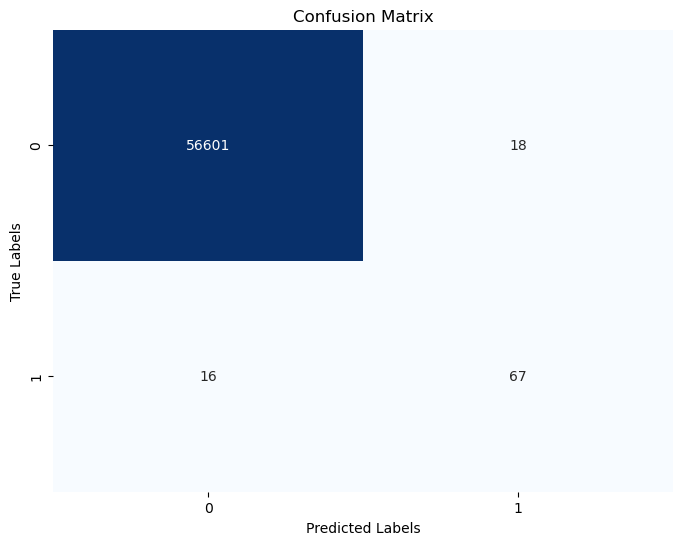

In [144]:
# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
